### Christopher Ayre
### DATA 620

#### WEEK 6 - ASSIGNMENT DATA SETS

__ASSIGNMENT__

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

* Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.   [For more background information, see also:http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.

* Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat

* Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

__What can you infer about the relationships between (1) the women, and (2) the social events?__

In [3]:
# LIBRARIES USED

import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bi


/Users/cayre/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/cayre/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Users/cayre/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


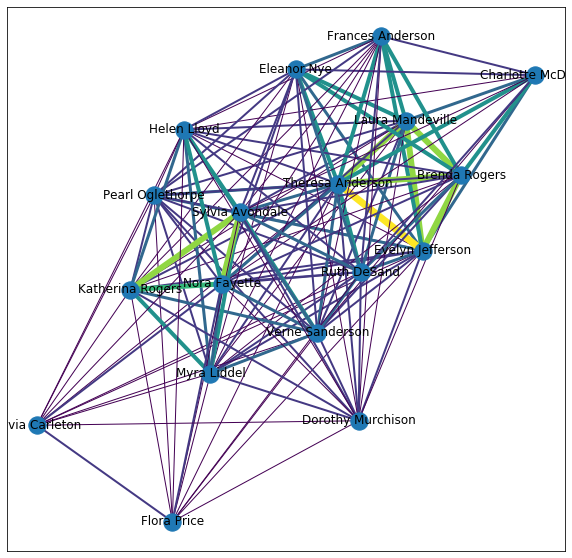

In [4]:
# Investigating the strength of the connections between the women (clubs)

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

# bipartite graph and w/ number of co-occurence
W = bi.projected_graph(G, women)
W = bi.weighted_projected_graph(G, women, ratio=False)


weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.figure(figsize = (10,10))
nx.draw_networkx(W, width=weights, edge_color=weights)

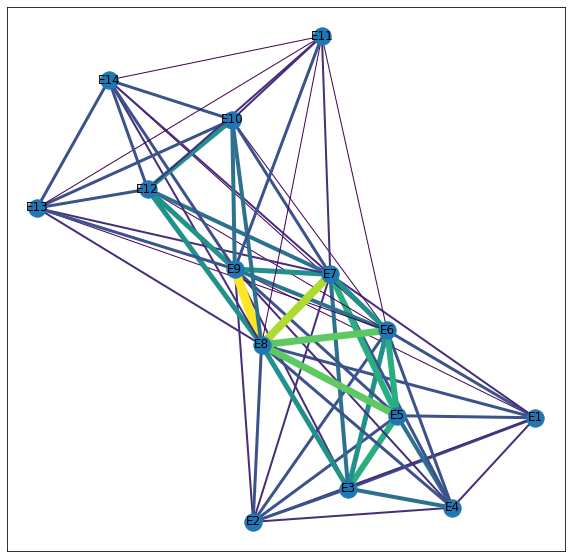

In [5]:
# # Investigating the strength of the connections between the events

G2 = nx.davis_southern_women_graph()
women = G2.graph['bottom']
events = G2.graph['top']

# bipartite graph and w/ number of co-occurence
e = bi.projected_graph(G2, women)
e = bi.weighted_projected_graph(G2, women, ratio=False)

e.edges(data=True)
weights=[edata['weight'] for f,t,edata in e.edges(data=True)]
plt.figure(figsize=(10,10))
nx.draw_networkx(e, width=weights, edge_color=weights)

In [9]:
deg = nx.degree(G)
sorted(list(deg)[0:4], key=lambda x: x[1], reverse=True)

[('Evelyn Jefferson', 8),
 ('Theresa Anderson', 8),
 ('Laura Mandeville', 7),
 ('Brenda Rogers', 7)]

__Evelyn Jefferson and theresa Anderson are the most popular women with each belonging to 8 different social clubs. While clubs E6-E9 are the most popular. We can tell from the abundance of connections and the strength of connection which is represented by line thickness.__
